In [55]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import StratifiedShuffleSplit
import warnings
warnings.filterwarnings('ignore')
from sklearn.utils import shuffle
import geopandas as gpd


https://medium.com/digital-catapult/dealing-with-imbalanced-data-8b21e6deb6cd

**Importing data**

In [2]:
filename_1 = "../data/_tarefelt1.csv"

In [57]:
X = pd.read_csv(filename_1)


**Analysing variance**

In [58]:
X.columns

Index(['Unnamed: 0', 'band_0', 'band_1', 'band_2', 'band_3', 'band_4',
       'band_5', 'band_6', 'band_7', 'band_8', 'band_9', 'band_10', 'band_11',
       'band_12', 'band_13', 'band_14', 'band_15', 'band_16', 'band_17',
       'band_18', 'band_19', 'band_20', 'band_21', 'band_22', 'band_23',
       'band_24', 'band_25', 'band_26', 'band_27', 'band_28', 'band_29',
       'band_30', 'band_31', 'band_32', 'band_33', 'band_34', 'band_35',
       'band_36', 'band_37', 'band_38', 'band_39', 'band_40', 'band_41',
       'band_42', 'band_43', 'band_44', 'band_45', 'band_46', 'band_47',
       'band_48', 'band_49', 'band_50', 'band_51', 'band_52', 'band_53',
       'band_54', 'band_55', 'band_56', 'band_57', 'band_58', 'band_59',
       'band_60', 'band_61', 'band_62', 'band_63', 'band_64', 'band_65', 'lat',
       'lon', 'geometry', 'label'],
      dtype='object')

In [59]:
X_var = X.drop(columns = ['lat','lon', 'geometry', 'Unnamed: 0'])

Text(0.5, 0.98, 'Intensiteten til de ulike båndene')

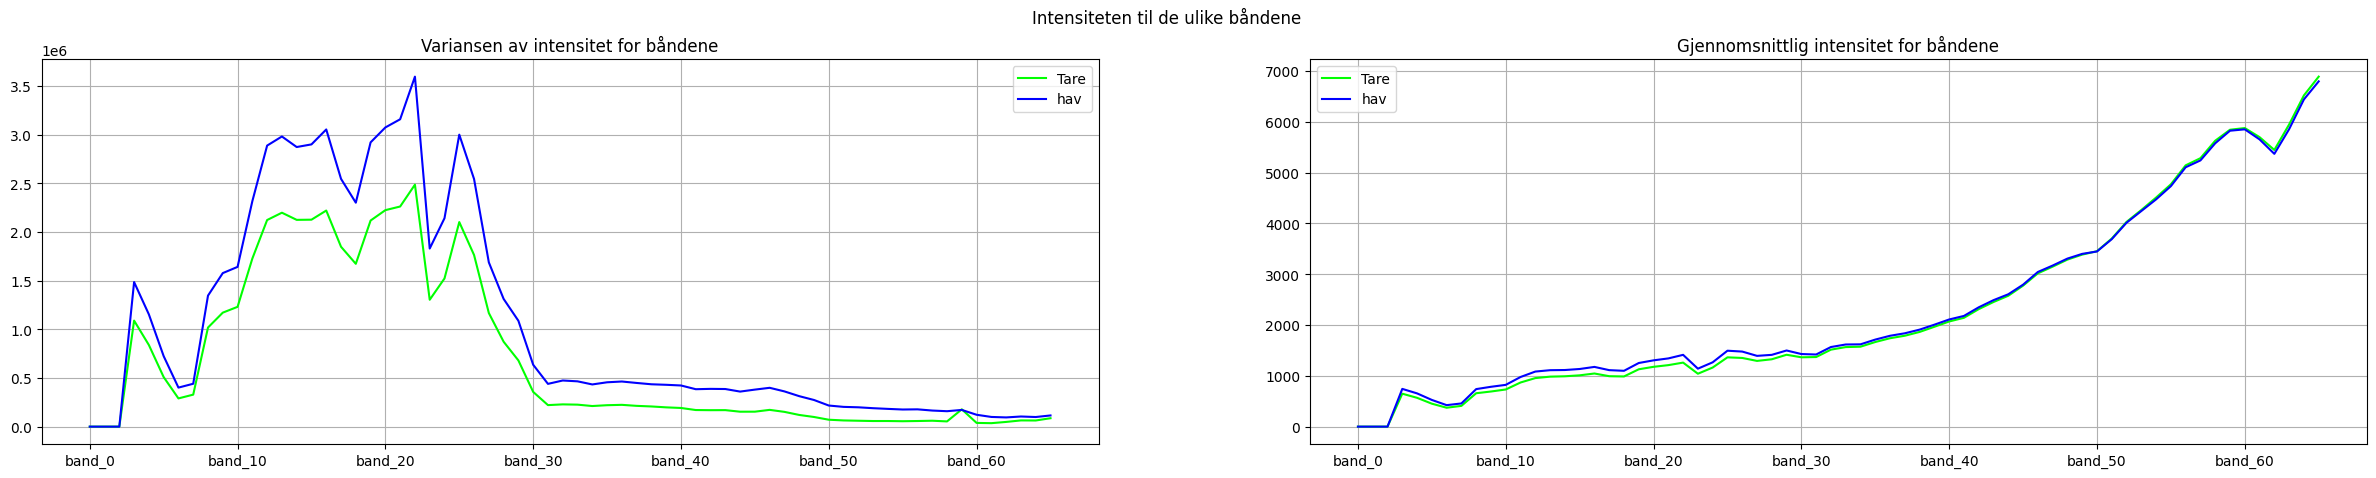

In [60]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (30,5))

#X_var.drop(columns = "label").var().plot(ax = ax1, color = "green", label = "Alle instanser")
X_var[X_var.label == 1].drop(columns = "label").var().plot(ax = ax1, color = "lime", label = "Tare")
X_var[X_var.label == 0].drop(columns = "label").var().plot(ax = ax1, color = "blue", label = "hav")
ax1.set_title("Variansen av intensitet for båndene")
ax1.grid()
ax1.legend()

#X_var.drop(columns = "label").mean().plot(ax = ax2, color = "green", label = "Alle instanser")
X_var[X_var.label == 1].drop(columns = "label").mean().plot(ax = ax2, color = "lime", label = "Tare")
X_var[X_var.label == 0].drop(columns = "label").mean().plot(ax = ax2, color = "blue", label = "hav")
ax2.set_title("Gjennomsnittlig intensitet for båndene")
ax2.legend()
ax2.grid()

fig.suptitle("Intensiteten til de ulike båndene")

In [61]:
X_info = X.drop(columns = ['Unnamed: 0', 'band_0', 'band_1', 'band_2', 'band_3', 'band_4',
       'band_5', 'band_6', 'band_7', 'band_8', 'band_9', 'band_10', 'band_11',
       'band_12', 'band_13', 'band_14', 'band_15', 'band_16', 'band_17',
       'band_18', 'band_19', 'band_20', 'band_21', 'band_22', 'band_23',
       'band_24', 'band_25', 'band_26', 'band_27', 'band_28', 'band_29',
       'band_30', 'band_31', 'band_32', 'band_33', 'band_34', 'band_35',
       'band_36', 'band_37', 'band_38', 'band_39', 'band_40', 'band_41',
       'band_42', 'band_43', 'band_44', 'band_45', 'band_46', 'band_47',
       'band_48', 'band_49', 'band_50', 'band_51', 'band_52', 'band_53',
       'band_54', 'band_55', 'band_56', 'band_57', 'band_58', 'band_59',
       'band_60', 'band_61', 'band_62', 'band_63', 'band_64', 'band_65', 'lat',
       'lon', 'geometry', ])

In [62]:
X_info.value_counts()

label
0.0      946261
1.0       53739
Name: count, dtype: int64